<a href="https://colab.research.google.com/github/kanish-dev/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roll-no:2021CSE0889<br>
Name:Kanishka R Reddy<br>
Subject: Data-Mining<br>
Project-name: Prediction of sentiment using <i><b>machine learning</b></i> and <i><b>natural language processing(nlp)</b></i><br>




In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install  matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
! pip install pickle4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pickle4: filename=pickle4-0.0.1-py2.py3-none-any.whl size=19707 sha256=bb91560e53ec450142e9fe4ca36c2f84a3b19b84341d6b52cba811da8fbaa176
  Stored in directory: /root/.cache/pip/wheels/be/be/f4/bcfb5c5279934700537e0aa84c9dc81a14392c775b107c4a5d
Successfully built pickle4


In [ ]:
import pandas as pd  # library for data analysis and data manuipulation
import matplotlib.pyplot as plt  # data visulization
import seaborn as sns   #provides a high level interface of datavisualization
from wordcloud import WordCloud   # visualize the text data
import re   # provides functions to pre-process the string

import nltk   # a library for natyural language processsing
from nltk.corpus import stopwords # a set of words which dont porvide any meaning to sentences
from nltk.stem import WordNetLemmatizer # convert diffrent forms of words into single item but dont change the context

from sklearn.feature_extraction.text import CountVectorizer  #transforms words to vectors
from sklearn.model_selection import  GridSearchCV   #hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier  # machine learning algorithm for classification

from sklearn.metrics  import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
"""
1. Accuracy Score – no. of correctly classified instances/total no. of instances
2. Precision Score – the ratio of correctly predicted instances over total positive instances
3. Recall Score – the ratio of correctly predicted instances over total instances in that class
4. Roc Curve – a plot of true positive rate against false positive rate
5. Classification Report - report of precision, recall and f1 score
6. Confusion Matrix – a table used to describe the classification models
"""
from scikitplot.metrics import plot_confusion_matrix
from pylab import rcParams
from sklearn.pipeline import Pipeline
import pickle


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/sanlp/train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("/content/drive/MyDrive/sanlp/val.txt",delimiter=';', names=['text','label'])

In [ ]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18000 non-null  object
 1   label   18000 non-null  object
dtypes: object(2)
memory usage: 281.4+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


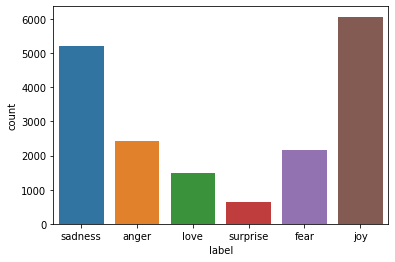

In [ ]:
sns.countplot(df.label)

As we can see 6 labels in the data sets

1. Positive Sentiment – “joy”,”love”,”surprise”

2. Negative Sentiment – “anger”,”sadness”,”fear”


lets define a custom encoder to convert catogerical data to numerical data


In [ ]:
def custom_enoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

In [ ]:
custom_enoder(df['label'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


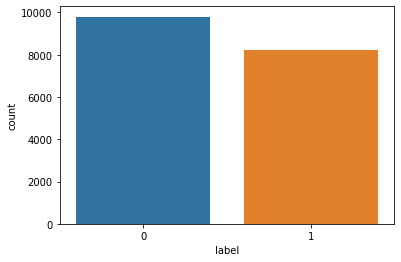

In [ ]:
sns.countplot(df.label)

<i><b><h3>Now we can see tht our target has been changed to 1 as positive and 0 as negative</h3></b></i>

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [ ]:
# creating the instance of the WordNetLemmatizer
lm = WordNetLemmatizer()

<h1>Creating the Text transformation function </h1>

In [ ]:
def text_transformation(df_col):
  corpus = []
  for text in df_col:
    new_text = re.sub('[^A-Za-z$]',' ',str(text))
    new_text = new_text.lower().split()
    new_text = [lm.lemmatize(word) for word in new_text if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(str(x) for x in new_text))
  return corpus

In [ ]:
corpus = text_transformation(df['text'])
print(corpus)

<h4>we will create a Word Cloud. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.</h4>

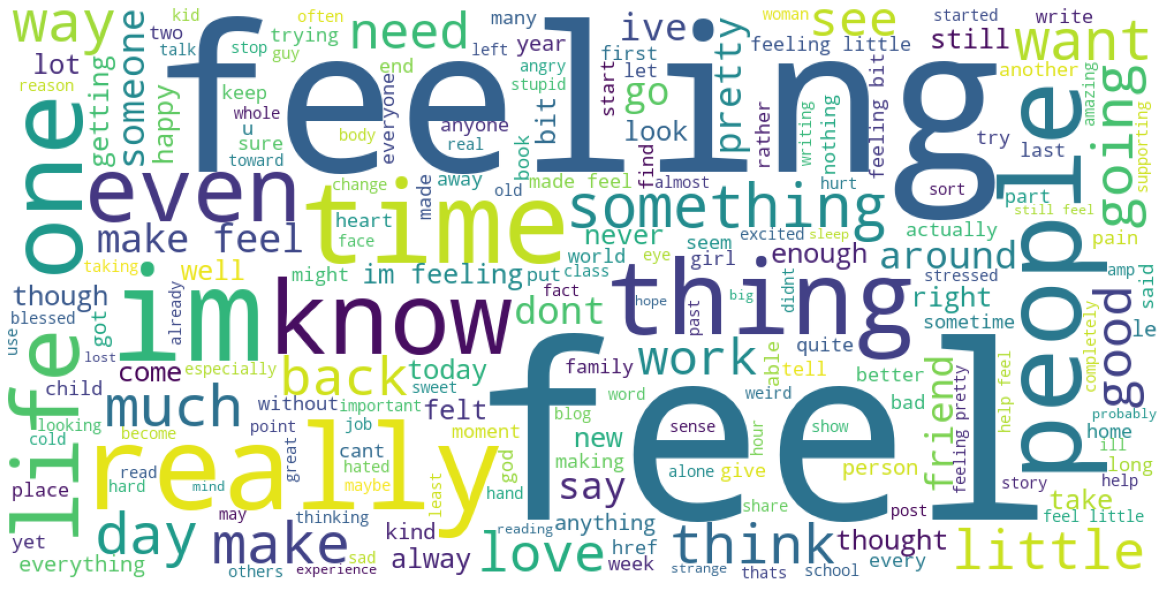

In [ ]:
#rcParams['figure.figsize'] = 20,8
word_cloud = " "
for row in corpus:
    for word in row:
        word_cloud =word_cloud+" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.figure(figsize=(20,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


<h1>Bag Of Words</h1>

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X=traindata
y=df.label

In [ ]:
rfc=RandomForestClassifier(max_features='sqrt',
                                      max_depth=None,
                                      n_estimators=1000,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap='True')

In [ ]:
pipeline = Pipeline(steps= [('cvector', CountVectorizer(ngram_range=(1,2))),
('model', RandomForestClassifier(max_features='sqrt',
                                      max_depth=None,
                                      n_estimators=1000,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap='True'))])
#fit the pipeline model with the training data
pipeline.fit(corpus,y)

Pipeline(steps=[('cvector', CountVectorizer(ngram_range=(1, 2))),
                ('model',
                 RandomForestClassifier(bootstrap='True', min_samples_split=5,
                                        n_estimators=1000))])

In [ ]:
file=open('sentiment_analysis_model.pkl','wb')
pickle.dump(pipeline,file)


In [ ]:
test_df = pd.read_csv("test.txt",delimiter=';',names=['text','label'])

In [ ]:
x_test,y_test= test_df.text,test_df.label

test_df =custom_enoder(y_test)

test_corpus=text_transformation(x_test)

predictions=pipeline.predict(test_corpus)


Accuracy Score:  0.9605
Precision Score:  0.9595628415300547
Recall Score:  0.9543478260869566
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1080
           1       0.96      0.95      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



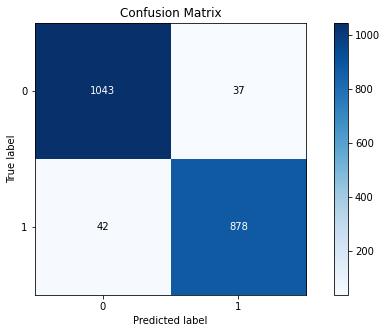

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score=accuracy_score(y_test,predictions)
pre_score=precision_score(y_test,predictions)
rec_score=recall_score(y_test,predictions)
print('Accuracy Score: ',acc_score)
print('Precision Score: ',pre_score)
print('Recall Score: ',rec_score)
print('-----------------------------------------------------------------------')
crep=classification_report(y_test,predictions)
print(crep)

In [ ]:
predictions_probability = pipeline.predict_proba(test_corpus)

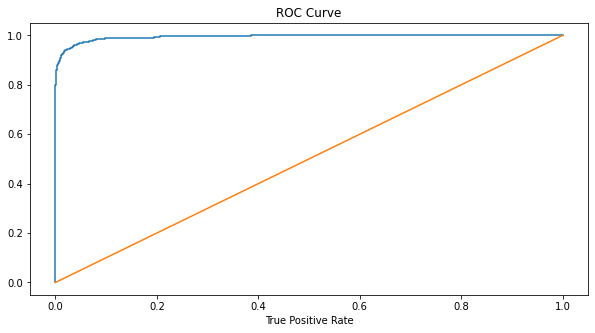

In [ ]:
false_positive_rate,true_positive_rate,threshold= roc_curve(y_test,predictions_probability[:,1])
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

<h3>Predicting the output for custom input</h3>

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
         print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [ ]:
def sentiment_predictor(input):
    input = text_transformation(input)
    #transformed_input = cv.transform(input)
    #prediction = rfc.predict(transformed_input)
    prediction = pipeline.predict(input)
    expression_check(prediction)

In [ ]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


## <h1>**END**<h1>